In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [17]:
# Let us read the data and take a look at first few rows.

df_store = pd.read_csv("SampleSuperstore.csv")
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
#column names of table

df_store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [19]:
#row,column count of data

df_store.shape

(9994, 13)

In [20]:
#check data type of columns/attributes

df_store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [21]:
df_store.isnull().sum()

# There are no missing values. Hence we can go exploratory analysis part directly.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [23]:
# Check for unnecessary columns and drop them if not required

df_store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [24]:
# Clearly the data is for US country only, so we can drop the 'Country' column as we dont 
# need any analysis to be done based on it.

#dropping Country column
df=df_store.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# We can analyse the data further in 3 different ways

# PRODUCT LEVEL ANALYSIS
# CUSTOMER LEVEL ANALYSIS
# ORDER LEVEL ANALYSIS

In [25]:
# Lets look at the product categories available to shop for customers

df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [26]:
#number of products in each category 

df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [27]:
#number of Sub-categories products are divided.

df['Sub-Category'].nunique()

17

In [28]:
#number of products in each sub-category

df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

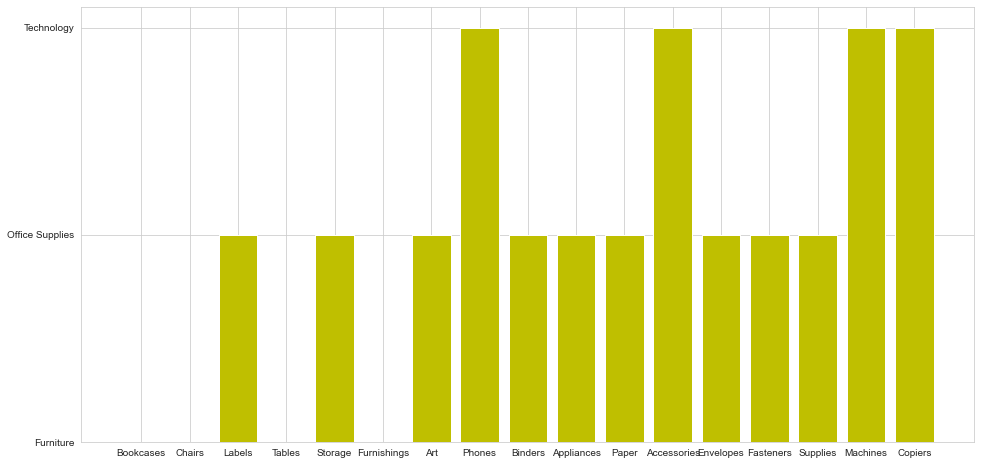

In [29]:
#Lets see how sub-categories are distributed wrt to category

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

# From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

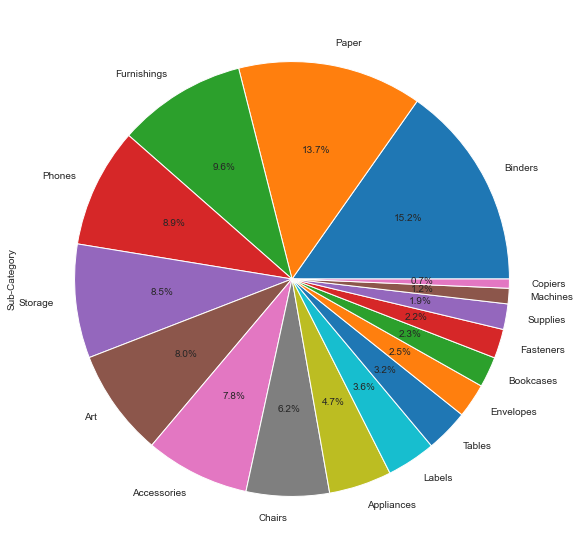

In [30]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# The store has wide variety of Office Supplies especially in Binders and Paper department.

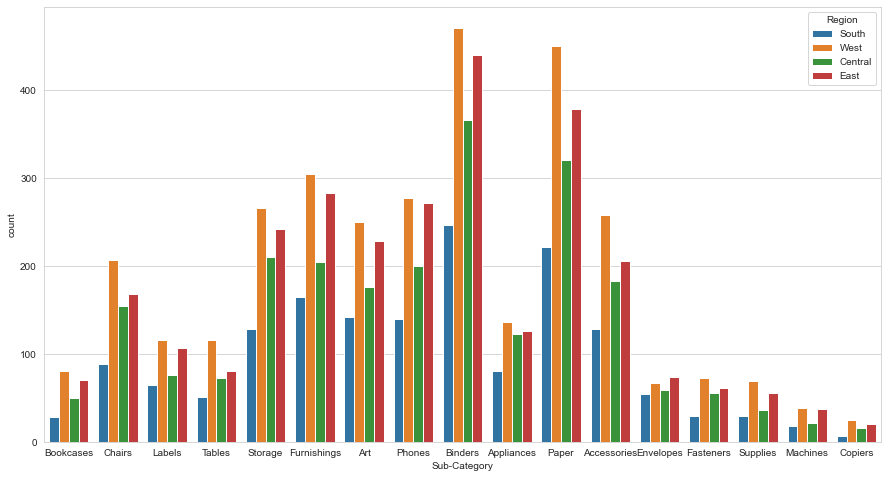

In [34]:
#Count of Sub-Category region wise

plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [ ]:
# People residing in Western part of US tend to order more from superstore.

In [ ]:
# Lets create some new columns like Cost,Profit%

In [35]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [36]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [40]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


In [ ]:
# Retailers selling Phones and Papers have got 100% Profit in their Business.

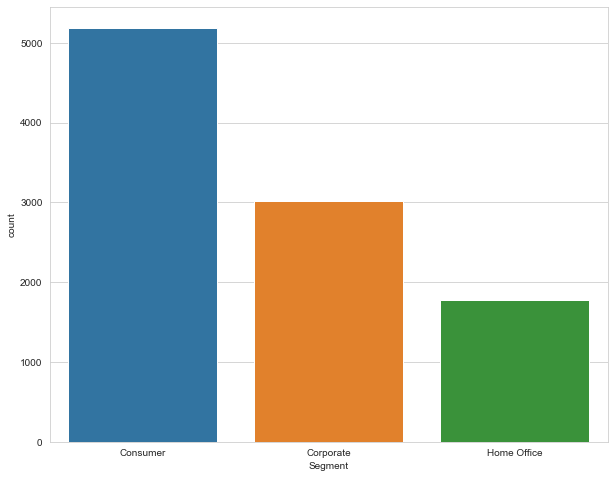

In [50]:
# Data with respect to Customer Level

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
plt.show()

In [ ]:
# The distribution is highest in Consumer Segment.

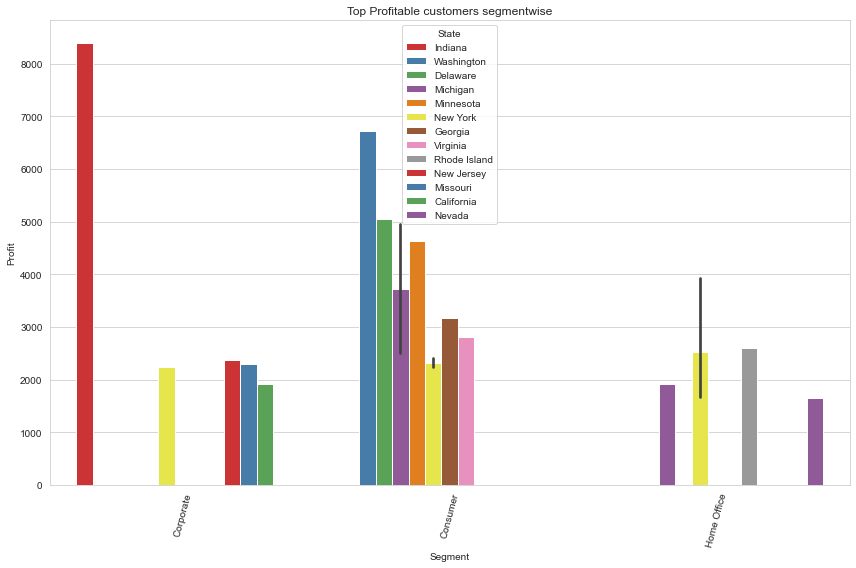

In [56]:
#Top Profitable customers segmentwise

sortedTop = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Segment', y='Profit',hue='State',palette='Set1', data=sortedTop, ax=ax)
ax.set_title("Top Profitable customers segmentwise")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [43]:
# Lets some Analysis with Order details of the data

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Cost,Profit %
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,201.201105,32.378384
std,32063.693350,623.245101,2.225110,0.206452,234.260108,550.839414,41.214409
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.554400,-73.333333
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,12.688200,8.108108
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,41.664000,36.986301
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,182.226300,56.862745
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,24449.558400,100.000000


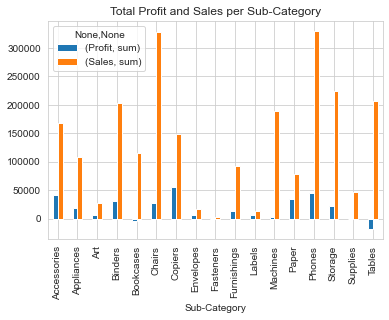

In [59]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

In [ ]:
# Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.
# Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.